In [19]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [20]:
df=pd.read_csv('File1.csv')
df


,Date Time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
0,01-01-2020 01:00,278.08,63.40,989.24,1.24,12.33,0.0,0,0.0,0.0000
1,01-01-2020 02:00,278.29,62.04,989.94,1.00,30.81,0.0,0,0.0,0.4890
2,01-01-2020 03:00,279.06,60.07,990.66,0.88,68.46,0.0,0,0.0,62.5803
3,01-01-2020 04:00,281.46,56.88,991.56,1.20,102.51,0.0,0,0.0,206.2024
4,01-01-2020 05:00,284.02,47.38,992.36,1.73,121.43,0.0,0,0.0,354.7542
...,...,...,...,...,...,...,...,...,...,...
18283,31-01-2022 20:00,283.88,67.04,981.18,2.00,111.63,0.0,0,0.0,0.0000
18284,31-01-2022 21:00,283.53,67.40,980.83,1.84,116.80,0.0,0,0.0,0.0000
18285,31-01-2022 22:00,283.17,67.86,980.47,1.62,121.49,0.0,0,0.0,0.0000
18286,31-01-2022 23:00,283.24,66.33,980.22,1.36,125.17,0.0,0,0.0,0.0000


In [21]:
df.index = pd.to_datetime(df['Date Time'], format='%d-%m-%Y %H:%M')
df[:26]

,Date Time,Temperature,Relative Humidity,Pressure,Wind speed,Wind direction,Rainfall,Snowfall,Snow depth,Short-wave irradiation
Date Time,,,,,,,,,,
2020-01-01 01:00:00,01-01-2020 01:00,278.08,63.40,989.24,1.24,12.33,0.0,0,0.0,0.0000
2020-01-01 02:00:00,01-01-2020 02:00,278.29,62.04,989.94,1.00,30.81,0.0,0,0.0,0.4890
2020-01-01 03:00:00,01-01-2020 03:00,279.06,60.07,990.66,0.88,68.46,0.0,0,0.0,62.5803
2020-01-01 04:00:00,01-01-2020 04:00,281.46,56.88,991.56,1.20,102.51,0.0,0,0.0,206.2024
2020-01-01 05:00:00,01-01-2020 05:00,284.02,47.38,992.36,1.73,121.43,0.0,0,0.0,354.7542
2020-01-01 06:00:00,01-01-2020 06:00,287.55,37.86,992.51,2.58,126.37,0.0,0,0.0,462.2105
2020-01-01 07:00:00,01-01-2020 07:00,290.05,31.63,991.90,3.27,128.98,0.0,0,0.0,517.4510
2020-01-01 08:00:00,01-01-2020 08:00,291.32,29.19,990.92,3.38,129.82,0.0,0,0.0,511.8024
2020-01-01 09:00:00,01-01-2020 09:00,291.97,28.52,990.11,3.37,132.33,0.0,0,0.0,442.0820


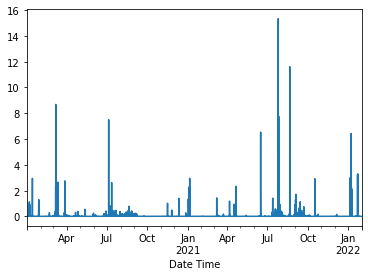

In [22]:
temp= df['Rainfall']
temp.plot()

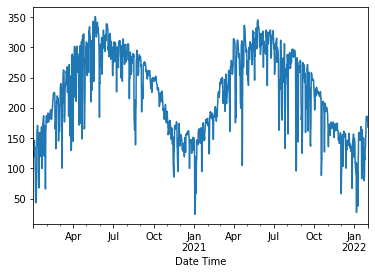

In [23]:
wave1= df['Short-wave irradiation']
wave2 = wave1.rolling(window = 24).mean()
wave2.plot()

In [24]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=54):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [25]:
WINDOW_SIZE = 54
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((18234, 54, 1), (18234,))

In [26]:
X_train1, y_train1 = X1[:16000], y1[:16000]
X_val1, y_val1 = X1[16000:16500], y1[16000:16500]
X_test1, y_test1 = X1[16500:], y1[16500:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((16000, 54, 1), (16000,), (500, 54, 1), (500,), (1734, 54, 1), (1734,))

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((54, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [28]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [29]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp1])

Epoch 1/30
500/500 [==============================] - ETA: 0s - loss: 0.1083 - root_mean_squared_error: 0.3291

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


500/500 [==============================] - 16s 29ms/step - loss: 0.1083 - root_mean_squared_error: 0.3291 - val_loss: 1.6382e-04 - val_root_mean_squared_error: 0.0128
Epoch 2/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0870 - root_mean_squared_error: 0.2950 - val_loss: 9.5217e-04 - val_root_mean_squared_error: 0.0309
Epoch 3/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0678 - root_mean_squared_error: 0.2604 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0412
Epoch 4/30
499/500 [============================>.] - ETA: 0s - loss: 0.0568 - root_mean_squared_error: 0.2383

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


500/500 [==============================] - 14s 28ms/step - loss: 0.0567 - root_mean_squared_error: 0.2381 - val_loss: 1.3064e-04 - val_root_mean_squared_error: 0.0114
Epoch 5/30
498/500 [============================>.] - ETA: 0s - loss: 0.0493 - root_mean_squared_error: 0.2220

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


500/500 [==============================] - 14s 28ms/step - loss: 0.0491 - root_mean_squared_error: 0.2216 - val_loss: 7.5028e-05 - val_root_mean_squared_error: 0.0087
Epoch 6/30
500/500 [==============================] - ETA: 0s - loss: 0.0436 - root_mean_squared_error: 0.2088

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


500/500 [==============================] - 14s 28ms/step - loss: 0.0436 - root_mean_squared_error: 0.2088 - val_loss: 4.4852e-06 - val_root_mean_squared_error: 0.0021
Epoch 7/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0391 - root_mean_squared_error: 0.1978 - val_loss: 2.1346e-04 - val_root_mean_squared_error: 0.0146
Epoch 8/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0357 - root_mean_squared_error: 0.1888 - val_loss: 6.2148e-05 - val_root_mean_squared_error: 0.0079
Epoch 9/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0328 - root_mean_squared_error: 0.1811 - val_loss: 8.5667e-05 - val_root_mean_squared_error: 0.0093
Epoch 10/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0303 - root_mean_squared_error: 0.1740 - val_loss: 1.0940e-04 - val_root_mean_squared_error: 0.0105
Epoch 11/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0281 - root_mean_squared_error: 0.1675 - 

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


500/500 [==============================] - 14s 29ms/step - loss: 0.0160 - root_mean_squared_error: 0.1264 - val_loss: 6.1154e-07 - val_root_mean_squared_error: 7.8201e-04
Epoch 23/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0153 - root_mean_squared_error: 0.1238 - val_loss: 0.0013 - val_root_mean_squared_error: 0.0361
Epoch 24/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0152 - root_mean_squared_error: 0.1233 - val_loss: 4.5045e-05 - val_root_mean_squared_error: 0.0067
Epoch 25/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0148 - root_mean_squared_error: 0.1215 - val_loss: 1.8765e-05 - val_root_mean_squared_error: 0.0043
Epoch 26/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - val_loss: 1.9519e-04 - val_root_mean_squared_error: 0.0140
Epoch 27/30
500/500 [==============================] - 10s 20ms/step - loss: 0.0141 - root_mean_squared_error: 0.1189

In [30]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [31]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,0.008154,0.010290
1,0.013679,0.010831
2,0.010884,0.009152
3,0.008703,0.004113
4,0.001899,0.000475
...,...,...
15995,0.000782,0.000000
15996,0.000782,0.000000
15997,0.000782,0.000000
15998,0.000781,0.000000
